# El análisis de regresión

En las aplicaciones de la ciencia de datos, es muy común estar interesado en la relación entre dos o más variables.

El análisis de regresión es una técnica en la cual buscamos encontrar una función que pueda describir la relación observada en los datos entre dos o mas variables.

Por ejemplo, una persona podría querer relacionar los pesos de los individuos con sus alturas… 
- ¿Son los más altos más pesados? 
-  …y¿cuánto más pesados?

Pensemos en el caso más sencillo: una **regresión lineal simple** o univariada. Tenemos una variable que deseamos explicar o predecir (Y)
como función de otra (X).

Para esto, buscamos la pendiente e intercepto de una funciónla recta de la forma:

$Y = \alpha + \beta X$

que se ajuste mejor al conjunto de datos con los que se cuenta.

donde $X$ es la variable explicativa e $Y$ es la variable dependiente.  La pendiente de la recta es $b$, y $a$ es la intersección (el valor de $y$ cuando $x = 0$).

![](attachment:img/img_sesion3/gif_regresion2.gif)

Para esto, entendemos que la variable que deseamos entender (Y, variable dependiente) se puede descomponer en dos partes: una que es sistemática
o que se puede explicar directamente con una o más variables independientes (Xs o regresores) y otra que es no sistemática o error
($\mu$ o $epsilon$) , que es aquella parte que no se puede explicar y representa a la aleatoriedad del fenómeno.

![](attachment:img/img_sesion3/gif_regresion1.gif)

La parte sistemática entonces la describimos con una forma funcional, que depende de otras variables o regresores.

Esta forma funcional puede ser lineal univariada, lineal múltiple o no lineal. El tipo de forma funcional, definirá el tipo de regresión de la que estemos hablando.

Ventajas del análisis de regersión: es facil decsribir cuantitaivamente una rlación.

Esquemáticamente, los elementos son:

![](attachment:img/img_sesion3/regresion_esquema.png)

**Importante tener en cuenta**

Antes de intentar ajustar un modelo lineal a los datos observados, la persona debe determinar primero si existe o no una relación entre las variables de interés. Esto no implica necesariamente que una variable **cause** la otra (por ejemplo, puntajes más altos en la PSU **no
causan** calificaciones superiores en la universidad), pero existe alguna asociación significativa entre las dos variables.

Un diagrama de dispersión puede ser una herramienta útil para determinar la fuerza de la relación entre dos variables. Si parece no haber
asociación entre las variables explicativas y dependiente propuestas (es decir, el diagrama de dispersión no indica ninguna tendencia creciente o
decreciente), entonces ajustar un modelo de regresión lineal a los datos probablemente no proporcionará un modelo útil.

Una valiosa medida numérica de asociación entre dos variables es el coeficiente de correlación, que es un valor entre -1 y 1 que indica la fuerza de la asociación de los datos observados para las dos variables.

## Una perspectiva histórica:

EL origen de la técnica, podemos remontarlo a la genética.

Francis Galton estudió la variación y la herencia de los rasgos humanos. Entre muchos otros rasgos, Galton recolectó y estudió datos de altura de familias para tratar de entender la herencia. **Mientras hacía esto, desarrolló los conceptos de correlación y regresión.**

Por supuesto, en el momento en que se recogieron estos datos, nuestro conocimiento de la genética era bastante limitado en comparación con lo
que conocemos hoy en día. Una pregunta muy específica que Galton trató de responder fue:

    ¿qué tan bien podemos predecir la estatura de un niño basado en la estatura de los padres? 

La técnica que desarrolló para responder a esta pregunta, la regresión, también puede aplicarse en muchas otras circunstancias.

Nota histórica: Galton hizo importantes contribuciones a la estadística y la genética, pero también fue uno de los primeros defensores de la
eugenesia, un movimiento filosófico científicamente defectuoso favorecido por muchos biólogos de la época de Galton pero con terribles
consecuencias históricas.

<img src="./img/img_sesion3/galton.png" width="400">

## Estudio de caso: ¿es hereditaria la altura?

Tenemos acceso a los datos de altura de familias recolectado por Galton, a través del paquete `HistData`. Estos datos contienen las alturas de
varias docenas de familias: madres, padres, hijas e hijos.


In [1]:
# Cargamos los paquetes que vamos a usar
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns

# Si no tiene stats models, instalar: pip install statsmodels

# Cargar el conjunto de datos GaltonFamilies
galton_data = sm.datasets.get_rdataset("GaltonFamilies", package="HistData").data

# Mostrar las primeras filas del DataFrame
print(galton_data.head())

  family  father  mother  midparentHeight  children  childNum  gender  \
0    001    78.5    67.0            75.43         4         1    male   
1    001    78.5    67.0            75.43         4         2  female   
2    001    78.5    67.0            75.43         4         3  female   
3    001    78.5    67.0            75.43         4         4  female   
4    002    75.5    66.5            73.66         4         1    male   

   childHeight  
0         73.2  
1         69.2  
2         69.0  
3         69.0  
4         73.5  


Para imitar el análisis de Galton, crearemos un conjunto de datos con
las alturas de los padres y un hijo de cada familia seleccionado al
azar:


In [2]:
# Filtrar por género masculino y seleccionar una muestra de una altura de hijo por familia
galton_heights = galton_data[galton_data['gender'] == 'male']\
    .groupby('family')\
    .apply(lambda group: group.sample(n=1))\
    .reset_index(drop=True)\
    .loc[:, ['father', 'childHeight']]\
    .rename(columns={'childHeight': 'son'})

print(galton_heights)

     father   son
0      78.5  73.2
1      75.5  72.5
2      75.0  71.0
3      75.0  68.5
4      75.0  72.0
..      ...   ...
174    64.0  68.0
175    64.0  64.5
176    64.0  66.0
177    62.0  64.0
178    62.5  66.5

[179 rows x 2 columns]


En los ejercicios, examinaremos otras relaciones, incluidas las de madres e hijas.

Supongamos que se nos pidiera que resumiéramos (describieramos) los datos de padres e hijos. Dado que ambas distribuciones están bien aproximadas por la distribución normal, podríamos usar los dos promedios y dos desviaciones estándar como resúmenes:


In [3]:
promedio_padre = galton_heights['father'].mean()
sd_padre = galton_heights['father'].std()
promedio_hijo = galton_heights['son'].mean()
sd_hijo = galton_heights['son'].std()

resumen_estadistico = pd.DataFrame({
    'promedio_padre': [promedio_padre],
    'sd_padre': [sd_padre],
    'promedio_hijo': [promedio_hijo],
    'sd_hijo': [sd_hijo]
})

print(resumen_estadistico)

   promedio_padre  sd_padre  promedio_hijo   sd_hijo
0       69.098883  2.546555      69.401676  2.574343


Sin embargo, este resumen no describe una característica importante de
los datos: **la tendencia de que cuanto más alto es el padre, más alto
es el hijo.**


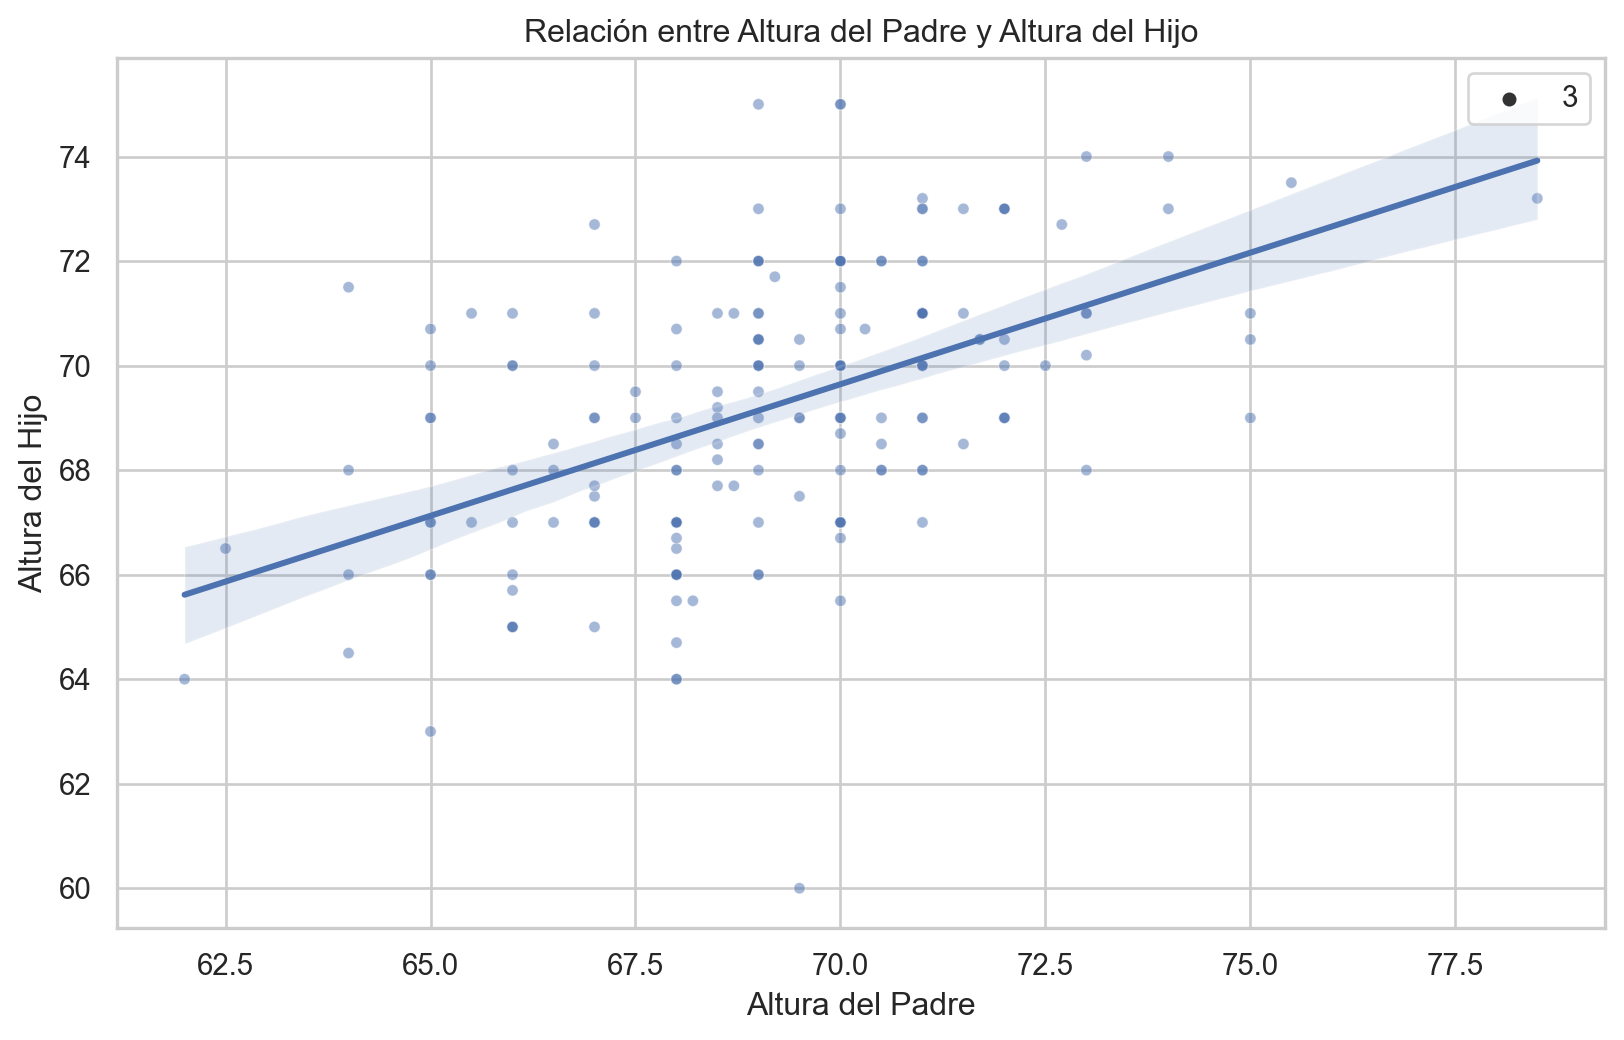

In [4]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Cargar el conjunto de datos GaltonFamilies
galton_data = sm.datasets.get_rdataset("GaltonFamilies", package="HistData").data

# Filtrar por género masculino y seleccionar una muestra de una altura de hijo por familia
galton_heights = galton_data[galton_data['gender'] == 'male']\
    .groupby('family')\
    .apply(lambda group: group.sample(n=1))\
    .reset_index(drop=True)\
    .loc[:, ['father', 'childHeight']]\
    .rename(columns={'childHeight': 'son'})

# Crear el gráfico de dispersión con línea de regresión
sns.set(style="whitegrid")
sns.scatterplot(data=galton_heights, x='father', y='son', alpha=0.5, size=3)
sns.regplot(data=galton_heights, x='father', y='son', scatter=False)

plt.xlabel("Altura del Padre")
plt.ylabel("Altura del Hijo")
plt.title("Relación entre Altura del Padre y Altura del Hijo")

# Mostrar el gráfico
plt.show()

Aprenderemos que el **coeficiente de correlación** es un resumen
informativo de cómo dos variables se mueven juntas y luego veremos cómo
esto puede ser usado para predecir una variable usando la otra, en **una
regresión**.

## Taller de aplicación 2: Caso aplicación: Cursos de Verano

::: callout-tip
## **Taller de aplicación 2: Pregunta 1**

Considere los datos trabajados en el taller 1, sobre los cursos de verano. Recordemos la pregunta que queríamos responder:

> Asistir a cursos de verano mejora los resultados académicos?

-   Plantee un modelo de regresión con los datos disponibles y estímelo.
-   Grafique la dispoersión y la recta de regresión estimada.

:::